# Análise temporal COVID-19 Brasil 

# Escopo do projeto

* __1-Introdução__
* __2-Importação dos pacotes__
* __3-Funções__
* __4-Limpeza dos dados brutos__
* __5-Leitura dos dados limpos__
* __6-Hipóteses__
* __7-Visualização dos dados__
* __8-Modelo do Prophet__
* __9-Conclusões__

# 1 - Introdução

A pandemia causada pelo novo coronavírus (SARS-CoV-2) está sendo responsável por diversos desafios e adversidades dia após dia enfrentados pela área da saúde no mundo. No Brasil, esse vírus, levou o país a uma crise sanitária por conta de sua rápida trasmissão por todo o país, afetando a vida de milhões de pessoas. Dentre essas pessoas estão aquelas responsáveis por fornecer os cuidados e os tratamentos responsáveis por salvar vidas, e, como o Brasil é o quinto maior país do mundo e, segundo estimativas da ONU, é a sexta maior população mundial, o controle de um vírus com essas características se torna muito mais complicado.

Pensando nisso, a análise teve como objetivo encontrar padrões nas notificações dos casos e óbitos por COVID-19, tentando entender se existe alguma forma de prever os dias onde a demanda de profissionais de saúde e de recursos precisa ser maior.

### __Séries Temporais__

Uma série temporal é uma observação de uma variável ao longo do tempo, ao se analisar uma série temporal devemos procurar se existe alguma dependência da variável e do período temporal e tentar achar os possíveis padrões.Muitas vezes, se encontrados esses padrões, podemos descrever uma série temporal através de funções matemáticas que podem ser úteis nas tomadas de decisões. 

No contexto da COVID-19, se analisarmos os números de casos e óbitos em relação ao dia de notificação podemos considerar esses dados constituindo uma série temporal e, a partir disso, usar técnicas apropriadas a esse tipo de dados para tentar descrever seu comportamento ao decorrer do tempo.

#### Mas como isso pode ser útil?

Entender se existe um padrão dentro da notificação de casos pode ajudar o planejamento de Hospitais e dos órgãos de sáude para perceber uma eventual demanda maior em determinadas épocas e com isso tentar melhorar a logística de equipamentos, leitos e de profissionais.

### __Sazonalidade__

A sazonalidade é um fator crucial na hora de analisar séries temporais, ela nos ajuda a entender os padrões, podendo assumir diferentes comportamnetos, por exemplo:

* Sazonalidade semanal : os dados variam de acordo com o dia da semana
* Sazonalidade mensal : os dados variam de acordo com o dia do mês
* Sazonalidade anual : os dados variam de acordo com a época do ano

Além disso existem diversos outros fatores temporais que podem influenciar os dados, como por exemplo feriados.

# 2 - Importação dos pacotes

In [1]:
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
from plot import plot_time_series, million_formatter,thousand_formatter, percent_formatter
from model import Modelo_prophet_semanal
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setando parâmetros do matplotlib
mlt.rcParams['font.size'] = 18
mlt.rcParams['figure.figsize'] = (16,8)

# 3 - Funções

Aqui estão as funções auxiliares utilizadas no projeto:

In [3]:
help(Modelo_prophet_semanal)

Help on class Modelo_prophet_semanal in module model:

class Modelo_prophet_semanal(builtins.object)
 |  Modelo_prophet_semanal(dados: pandas.core.frame.DataFrame, teste_periodo: int = 0, holiday=True, pais: str = 'BR', regressors=[], **kwargs_model)
 |  
 |  Parâmetros Construtor:
 |  ---------------------
 |  dados : DataFrame com duas colunas de nome 'ds'(tipo datetime) e 'y'(tipo int ou float)
 |  teste_periodo : número inteiro representando o número de dias destinado para o teste
 |  **Kwargs_model : argumentos adicionais passados para a classe fbprophet.Prophet na hora de criar o modelo
 |  
 |  Atributos:
 |  ---------
 |  Definidos no construtor:
 |  -----------------------
 |      treino : dataset destinado aos dados de treino
 |      teste : dataset destinado aos dados de teste
 |      modelo : modelo do tipo fbprophet.Prophet
 |      previsao : previsao do modelo sobre dados de treino e teste
 |      
 |  Definido pela função c_valid():
 |  ------------------------------
 | 

In [4]:
help(plot_time_series)

Help on function plot_time_series in module plot:

plot_time_series(df: pandas.core.frame.DataFrame, title: str = '', subtitle: str = '', xlabel: str = '', ylabel: str = '', show: bool = False, ax=None, month_freq: int = 2, formatter_x=None, formatter_y=None, fonte: str = 'https://brasil.io/dataset/covid19/caso_full/', spines_invisible: list = ['top', 'right'], ylim: list = None, xlim: list = None, kwargs_grid: dict = {'axis': 'y', 'alpha': 0.6}, **kwargs_lineplot)
    Função que plota uma série temporal com os dados relacionados ao tempo no eixo x e os dados numéricos no eixo y
    
    Parâmetros:
    ----------
    df : DataFrame do pandas a serem passados os gráfico, precisa ter 2 colunas, uma com dados do tipo datetime e outra com dados numéricos, tipo : pandas.DataFrame, argumento obrigatótio
    title : título do gráfico, tipo : str, padrão : ''
    subtitle : subtítulo do gráfico, tipo : str, padrão : ''
    xlabel : rótulo do eixo x, tipo : str, padrão : ''
    ylabel : rótulo

In [5]:
help(million_formatter)

Help on function million_formatter in module plot:

million_formatter(x, pos)
    Função responsável por formatar um eixo do 'matplotlib' dividindo os valores por Milhão, 
    mostrando duas casas decimais depois da vírgula e colocando a palavra 'Mi' após os valores indicando a grandeza,
    precisa ser passada como parâmetro para a função FuncFormatter do matplotlib.ticker



In [6]:
help(thousand_formatter)

Help on function thousand_formatter in module plot:

thousand_formatter(x, pos)
    Função responsável por formatar um eixo do 'matplotlib' dividindo os valores por Mil, 
    mostrando duas casas decimais depois da vírgula e colocando a palavra 'Mil' após os valores indicando a grandeza,
    precisa ser passada como parâmetro para a função FuncFormatter do matplotlib.ticker



In [7]:
million_formatter = FuncFormatter(million_formatter)
thousand_formatter = FuncFormatter(thousand_formatter)
percent_formatter = FuncFormatter(percent_formatter)

# 4 - Limpeza dos dados brutos

Os dados foram extraídos do [Brasil.IO](https://brasil.io/dataset/covid19/caso_full/) e foram tratados no notebook [Limpeza_dados_covid](https://github.com/PedroHCAlmeida/analise_temporal_COVID_Brasil/blob/main/notebooks/Limpeza_dados_covid.ipynb), esses dados estão divididos em 18 colunas, são elas:

* city : cidade
* city_ibge_code : código da cidade
* date : data das observações
* epidemiological_week : semana epidemiológica
* estimated_population : população estimada
* estimated_population_2019 : população estimada de 2019
* is_last : indica se os dados de relacionados ao last_avaiable são realmente os últimos
* is_repeated : se os valores são repeditos
* last_available_confirmed : última atualização do número total de casos confirmados
* last_available_confirmed_per_100k_inhabitants : última atualização do número total de casos confirmados por 100 mil habitantes
* last_available_date : data da última atualização
* last_available_death_rate : última atualização da taxa de mortes
* last_available_deaths : última atualização do número total de mortes confirmados
* order_for_place : 
* place_type : tipo de local, estado ou cidade
* state : sigla do estado correspondente
* new_confirmed : casos novos notificados no dia
* new_deaths : óbitos novos notificados no dia

# 5 - Leitura dos dados limpos

## Dados limpos

Após a limpeza dos dados brutos foram usadas as colunas de casos novos e de óbitos novos por dia para calcular o total por dia no Brasil, além disso foram criadas as colunas de média móvel de 7 dias para os dados de casos e óbitos e uma coluna com a "letalidade" naquela mÊs, que na verdade são os n;umeros de óbitos somados no país no mês dividido pelo número de casos no mesmo mês.

Colunas dos dados limpos:

* date : data relacionada ao número de casos e óbitos
* casos_novos : número de casos notificados no dia
* obitos_novos : número de óbitos notificados no dia
* MM7_casos : média móvel de 7 dias dos casos novos
* MM7_obitos : média móvel de 7 dias dos casos novos
* mes/ano : mes e ano correspondentes
* letalidade_mes : número de óbitos totais do mês divididos pelo número de casos notificados no mês

In [8]:
dados_br = pd.read_csv('../dados_limpos/dados_rj', parse_dates=['date'])

In [22]:
mob = pd.read_csv('../dados_limpos/mobilidade', parse_dates=['date'])

# 6 - Hipóteses 

* A média móvel de 7 dias de casos por dia em 2021 ultrapassou o pico de casos em 2020
* A média móvel de 7 dias de óbitos por dia em 2021 ultrapassou o pico de óbitos em 2020
* Nos finais de semana os casos notificados são menores do que no meio da semana
* Existe uma correlação entre o número de óbitos no dia e o número de casos em dias anteriores

# 7 - Visualização dos dados

In [9]:
dados_br.head()

,date,casos_novos,obitos_novos,MM7_casos,MM7_obitos,mes,letalidade_mes
0,2020-03-06,1,0,NaN,NaN,03-2020,0.030717
1,2020-03-07,0,0,NaN,NaN,03-2020,0.030717
2,2020-03-08,1,0,NaN,NaN,03-2020,0.030717
3,2020-03-09,0,0,NaN,NaN,03-2020,0.030717
4,2020-03-10,0,0,NaN,NaN,03-2020,0.030717


In [10]:
dados_br.tail()

,date,casos_novos,obitos_novos,MM7_casos,MM7_obitos,mes,letalidade_mes
467,2021-06-16,2485,109,1555.571429,88.714286,06-2021,0.05176
468,2021-06-17,2585,124,1645.428571,86.857143,06-2021,0.05176
469,2021-06-18,1953,51,1653.571429,76.428571,06-2021,0.05176
470,2021-06-19,0,0,1360.000000,62.142857,06-2021,0.05176
471,2021-06-20,0,0,1299.857143,59.285714,06-2021,0.05176


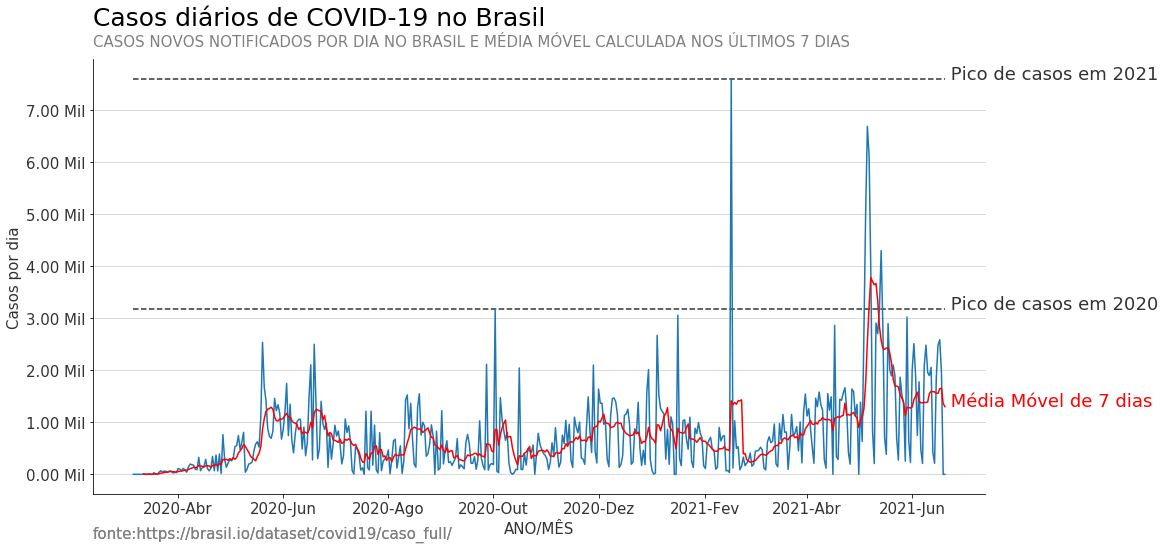

In [11]:
ax_casos=plot_time_series(dados_br[['casos_novos', 'date']])
plot_time_series(dados_br[['MM7_casos', 'date']],'Casos diários de COVID-19 no Brasil', 
                 'CASOS NOVOS NOTIFICADOS POR DIA NO BRASIL E MÉDIA MÓVEL CALCULADA NOS ÚLTIMOS 7 DIAS', color='red', ax=ax_casos, 
                 xlabel='ANO/MÊS', ylabel='Casos por dia', formatter_y=thousand_formatter)
plt.hlines(max(dados_br[dados_br['date'].dt.year == 2020].dropna()['casos_novos']), min(dados_br['date']), max(dados_br['date']), linestyle='--', alpha=0.8)
plt.annotate(' Pico de casos em 2020', (dados_br['date'].iloc[-1],max(dados_br[dados_br['date'].dt.year == 2020].dropna()['casos_novos'])), color='black', alpha=0.8)
plt.annotate(' Média Móvel de 7 dias', (dados_br['date'].iloc[-1],dados_br['MM7_casos'].iloc[-1]), color='red')
plt.hlines(max(dados_br.dropna()['casos_novos']), min(dados_br['date']), max(dados_br['date']), linestyle='--', alpha=0.8)
plt.annotate(' Pico de casos em 2021', (dados_br['date'].iloc[-1],max(dados_br.dropna()['casos_novos'])), color='black', alpha=0.8)
plt.show()

In [32]:
dados_br[dados_br['casos_novos'] == max(dados_br['casos_novos'])]

,date,casos_novos,obitos_novos,MM7_casos,MM7_obitos,mes,letalidade_mes
347,2021-02-16,7592,105,1412.0,60.0,02-2021,0.091293


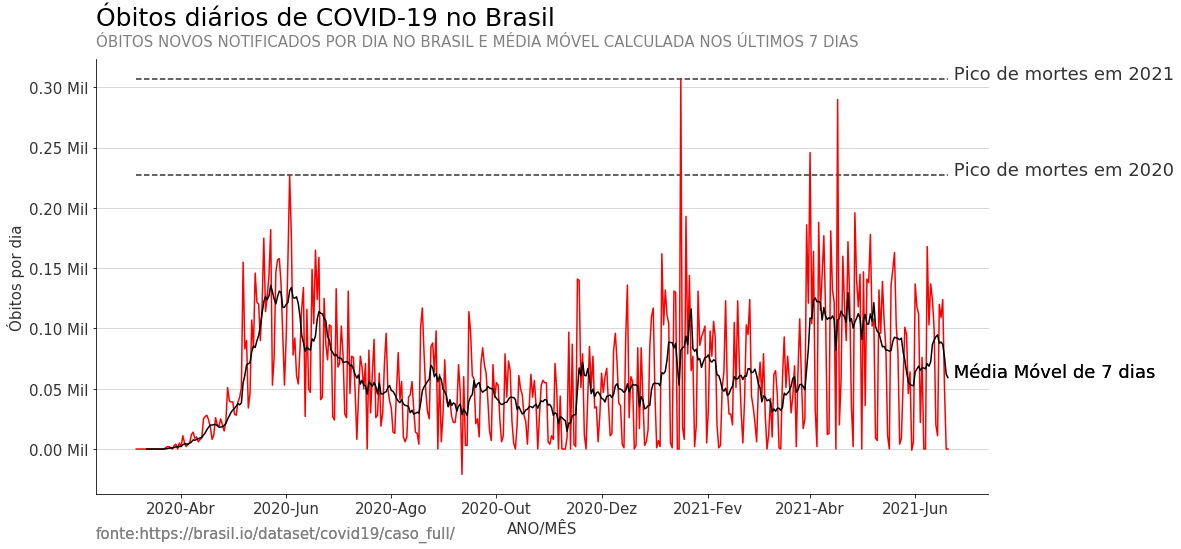

In [12]:
ax_obitos=plot_time_series(dados_br[['obitos_novos', 'date']], color='red')
plot_time_series(dados_br[['MM7_obitos', 'date']],'Óbitos diários de COVID-19 no Brasil',
                 'ÓBITOS NOVOS NOTIFICADOS POR DIA NO BRASIL E MÉDIA MÓVEL CALCULADA NOS ÚLTIMOS 7 DIAS', color='black', ax=ax_obitos, 
                 xlabel='ANO/MÊS', ylabel='Óbitos por dia',formatter_y=thousand_formatter)
plt.hlines(max(dados_br[dados_br['date'].dt.year == 2020]['obitos_novos']), min(dados_br['date']), max(dados_br['date']), linestyle='--', alpha=0.8)
plt.annotate(' Pico de mortes em 2020', (dados_br['date'].iloc[-1],max(dados_br[dados_br['date'].dt.year == 2020]['obitos_novos'])), color='black', alpha=0.8)
plt.hlines(max(dados_br.dropna()['obitos_novos']), min(dados_br['date']), max(dados_br['date']), linestyle='--', alpha=0.8)
plt.annotate(' Pico de mortes em 2021', (dados_br['date'].iloc[-1],max(dados_br.dropna()['obitos_novos'])), color='black', alpha=0.8)
plt.annotate(' Média Móvel de 7 dias', (dados_br['date'].iloc[-1],dados_br['MM7_obitos'].iloc[-1]), color='black')
plt.annotate(' Média Móvel de 7 dias', (dados_br['date'].iloc[-1],dados_br['MM7_obitos'].iloc[-1]), color='black')
plt.show()

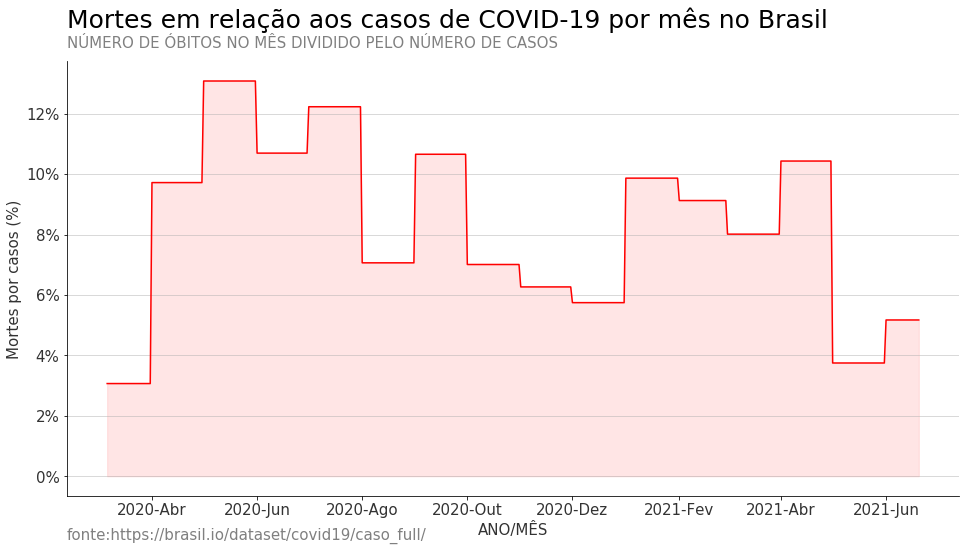

In [13]:
plot_time_series(dados_br[['letalidade_mes', 'date']],'Mortes em relação aos casos de COVID-19 por mês no Brasil', 'NÚMERO DE ÓBITOS NO MÊS DIVIDIDO PELO NÚMERO DE CASOS', 
                 xlabel='ANO/MÊS', ylabel='Mortes por casos (%)',formatter_y=percent_formatter, color='red')
plt.fill_between(dados_br['date'], dados_br['letalidade_mes'], color='red', alpha=0.1)
plt.show()

In [14]:
df_corr = pd.DataFrame()
dias_antes = []
corr = []

for i in range(1,22):
    dias_antes.append(i)
    corr.append(dados_br['obitos_novos'].corr(dados_br['casos_novos'].shift(i), method='spearman'))
df_corr['Casos_XDias_antes'] = dias_antes
df_corr['Correlacao_obitos'] = corr
df_corr = df_corr.set_index('Casos_XDias_antes')
df_corr

,Correlacao_obitos
Casos_XDias_antes,
1,0.368467
2,0.228781
3,0.168583
4,0.140439
5,0.203408
6,0.435945
7,0.540802
8,0.334609
9,0.191509


feriados = ['09/04/2020',
'10/04/2020',
'21/04/2020',
'23/04/2020',
'01/05/2020',
'11/06/2020',
'12/06/2020',
'07/09/2020',
'12/10/2020',
'15/10/2020',
'19/10/2020',
'28/10/2020',
'02/11/2020',
'15/11/2020',
'20/11/2020',
'29/11/2020',
'24/12/2020',
'25/12/2020',
'31/12/2020',
'01/01/2021',
'20/01/2021',
'21/01/2021',
'03/02/2021',
'12/02/2021',
'15/02/2021',
'16/02/2021',
'17/02/2021',
'26/03/2021',
'27/03/2021',
'28/03/2021',
'29/03/2021',
'30/03/2021',
'31/03/2021',
'01/04/2021',
'02/04/2021',
'03/04/2021',
'04/04/2021',
'21/04/2021',
'23/04/2021',
'01/05/2021',
'03/06/2021',
'04/06/2021']# 6 - Modelos de previsões

In [47]:
feriados = ['2020-04-09',
'2020-04-10',
'2020-04-21',
'2020-04-23',
'2020-05-01',
'2020-06-11',
'2020-06-12',
'2020-07-09',
'2020-10-12',
'2020-10-15',
'2020-10-19',
'2020-10-28',
'2020-11-02',
'2020-11-15',
'2020-11-20',
'2020-11-29',
'2020-12-24',
'2020-12-25',
'2020-12-31',
'2021-01-01',
'2021-01-20',
'2021-01-21',
'2021-02-03',
'2021-02-12',
'2021-02-15',
'2021-02-16',
'2021-02-17',
'2021-03-26',
'2021-03-27',
'2021-03-28',
'2021-03-29',
'2021-03-30',
'2021-03-31',
'2021-04-01',
'2021-04-02',
'2021-04-03',
'2021-04-04',
'2021-04-21',
'2021-04-23',
'2021-05-01',
'2021-06-03',
'2021-06-04']

Com o objetivo de analisar as séries temporais de números de casos e óbitos por dia de COVID-19 no Brasil, 

## 6.1 - Tipo de modelo

Prophet

## 6.2 - Métricas escolhidas

MSA RMSE

## 6.3 - Modelo para prever casos por dia de COVID-19 no Brasil

### 6.3.1 - Problema a ser resolvido

### 6.3.2 - Modelo mais simples

A fim de ter um ponto de partida como referência para realizar as melhoras do modelo será criado o modelo mais simples possível pelo Prophet a partir dos dados de casos novos por dia de COVID-19 no Brasil.

In [54]:
dados_casos = dados_br[['date', 'casos_novos']]
dados_casos.columns = ['ds', 'y']

In [55]:
modelo_casos_simples = Modelo_prophet_semanal(dados_casos, holiday=False)
modelo_casos_simples.c_valid(initial='180 days', period='30 days', horizon='30 days')
modelo_casos_simples.metricas()
modelo_casos_simples.metricas

  0%|          | 0/9 [00:00<?, ?it/s]

,horizon,rmse,mae,media_metricas,diff_rmse_mae
0,3 days,469.952814,393.305974,431.629394,76.64684
1,4 days,609.381621,470.870181,540.125901,138.511441
2,5 days,567.926762,403.9354,485.931081,163.991362
3,6 days,624.955226,436.715283,530.835255,188.239942
4,7 days,600.460528,439.986905,520.223717,160.473622
5,8 days,670.145122,497.878641,584.011882,172.26648
6,9 days,803.299385,554.961189,679.130287,248.338196
7,10 days,793.638418,576.709957,685.174187,216.928461
8,11 days,787.792683,602.951458,695.372071,184.841225
9,12 days,583.426359,492.713738,538.070049,90.712621


In [49]:
df_feriados = pd.DataFrame()

In [50]:
df_feriados['ds'] = pd.to_datetime(feriados)

In [51]:
df_feriados['holiday'] = 'Feriado_rj'

In [52]:
modelo_casos_simples = Modelo_prophet_semanal(dados_casos, holiday=False, holidays=df_feriados)
modelo_casos_simples.c_valid(initial='180 days', period='30 days', horizon='30 days')
modelo_casos_simples.metricas()
modelo_casos_simples.metricas

  0%|          | 0/9 [00:00<?, ?it/s]

,horizon,rmse,mae,media_metricas,diff_rmse_mae
0,3 days,471.376384,395.217192,433.296788,76.159192
1,4 days,607.046599,463.192222,535.11941,143.854376
2,5 days,566.63199,397.883422,482.257706,168.748568
3,6 days,622.690525,430.757976,526.72425,191.932549
4,7 days,599.969958,443.431799,521.700878,156.538159
5,8 days,667.108503,499.718967,583.413735,167.389535
6,9 days,798.245954,552.375532,675.310743,245.870423
7,10 days,785.049605,559.838683,672.444144,225.210922
8,11 days,780.765653,585.952891,683.359272,194.812762
9,12 days,580.400904,479.995779,530.198341,100.405124


## 6.4 - Modelo para previsão de óbitos por COVID-19 no Brasil

### 6.4.1 - Problema a ser resolvido

### 6.4.2 - Modelo mais simples

A fim de ter um ponto de partida como referência para realizar as melhoras do modelo será criado o modelo mais simples possível pelo Prophet a partir dos dados de óbitos novos por dia de COVID-19 no Brasil.

In [17]:
dados_obitos = dados_br[['date', 'obitos_novos']]
dados_obitos.columns = ['ds', 'y']

In [18]:
modelo_obitos_simples = Modelo_prophet_semanal(dados_obitos)
modelo_obitos_simples.c_valid(initial='180 days', period='7 days', horizon='7 days')
modelo_obitos_simples.metricas()
modelo_obitos_simples.metricas

  0%|          | 0/41 [00:00<?, ?it/s]

,horizon,rmse,mae,media_metricas,diff_rmse_mae
0,1 days,26.640353,20.268382,23.454368,6.371971
1,2 days,51.916878,41.791095,46.853987,10.125784
2,3 days,42.807477,32.762245,37.784861,10.045233
3,4 days,44.392795,32.791724,38.592259,11.601071
4,5 days,42.632687,34.524438,38.578562,8.108249
5,6 days,65.729803,39.291337,52.51057,26.438466
6,7 days,28.87505,20.889659,24.882355,7.985391
media,NaT,43.285006,31.75984,37.522423,11.525166
